# Random Forest para qualidade do vinho.


O objetivo deste projeto é prever a pontuação dos vinhos usando o algoritmo de Random Forest para classificação multiclasse.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("winequality-red.csv", delimiter=',')

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Características dos Vinhos (Features)**

Fixed Acidity: Acidez fixa do vinho.

Volatile Acidity: Acidez volátil do vinho.

Citric Acid: Quantidade de ácido cítrico no vinho.

Residual Sugar: Açúcar residual presente no vinho.

Chlorides: Nível de cloretos no vinho.

Free Sulfur Dioxide: Dióxido de enxofre livre no vinho.

Total Sulfur Dioxide: Quantidade total de dióxido de enxofre no vinho.

Density: Densidade do vinho.

pH: Nível de pH do vinho.

Sulphates: Quantidade de sulfatos no vinho.

Alcohol: Teor alcoólico do vinho.



**Variável de Saída (Target):**

Quality: Pontuação do vinho baseada em dados sensoriais, variando de 0 a 10.


# 1 - Pré processamento dos dados.

Verificação dos tipos de dados.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Não há dados faltantes e os dados estão no formato adequado

# 2 - Realize a segunda e terceita etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

B) Verifique o balanceamento da váriavel Target.

C)  Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.

D) Crie um novo dataframe apenas com as váriaveis que parecem ter maior correlação com a target. (Negativa ou positiva)


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Aqui tivemos algumas suspeitas de outliers em algumas colunas como total sulfur dioxide, mas não ficou claro. Por isso, resolver trazer o boxplot dessas variáveis. Note que separamos o Dataframe em duas parte pois as variáveis estavam em escalas bem diferentes.

In [ ]:
df_no_sulfur = df.drop(['total sulfur dioxide', 'free sulfur dioxide'], axis=1) #separando o DataFrame por conta da escala de dados

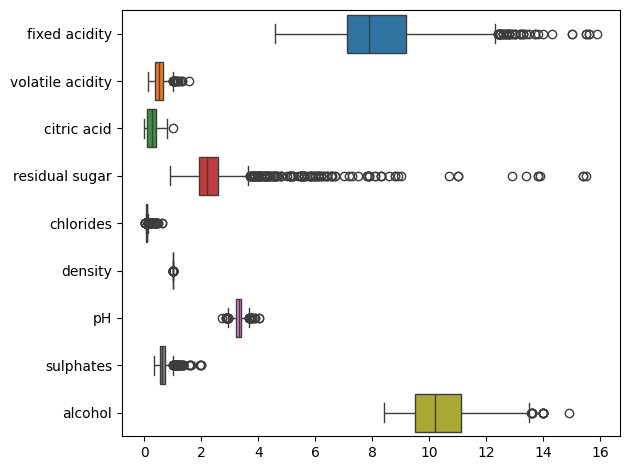

In [ ]:
sns.boxplot(data=df_no_sulfur.select_dtypes(include='float'), orient='h') #Visualizando em boxplots
plt.tight_layout()
plt.show()

In [ ]:
df_sulfur = df[['free sulfur dioxide', 'total sulfur dioxide']]

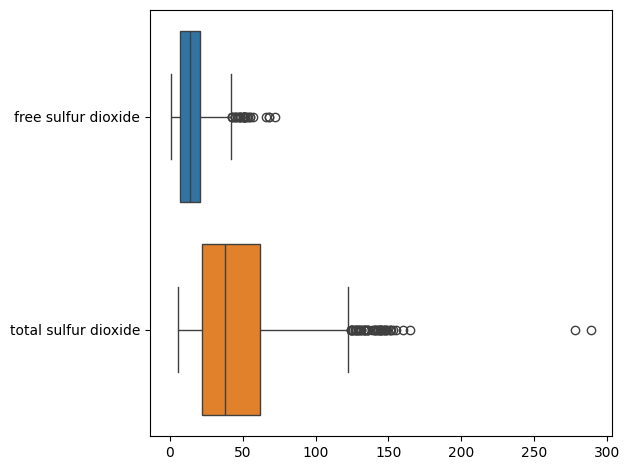

In [ ]:
sns.boxplot(data=df_sulfur.select_dtypes(include='float'), orient='h')
plt.tight_layout()
plt.show()

Concluimos que todo Dataframe possuia outliers e aplicamos o método IQR para removê-los.

In [ ]:
Q1 = df.quantile(0.25) #Eliminando outliers com método IQR
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
df_no_outliers.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,8.162002,0.523066,0.246760,2.185411,0.078586,15.020356,42.268024,0.996584,3.324623,0.631264,10.350792,5.623410
std,1.458270,0.164231,0.179441,0.440972,0.014317,8.792916,26.106438,0.001593,0.131731,0.116098,0.963954,0.721248
min,5.100000,0.120000,0.000000,1.200000,0.041000,1.000000,6.000000,0.992360,2.940000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995520,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,36.000000,0.996600,3.330000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.390000,2.500000,0.087000,20.000000,56.000000,0.997600,3.410000,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.730000,3.600000,0.119000,42.000000,122.000000,1.001000,3.680000,0.980000,13.400000,7.000000


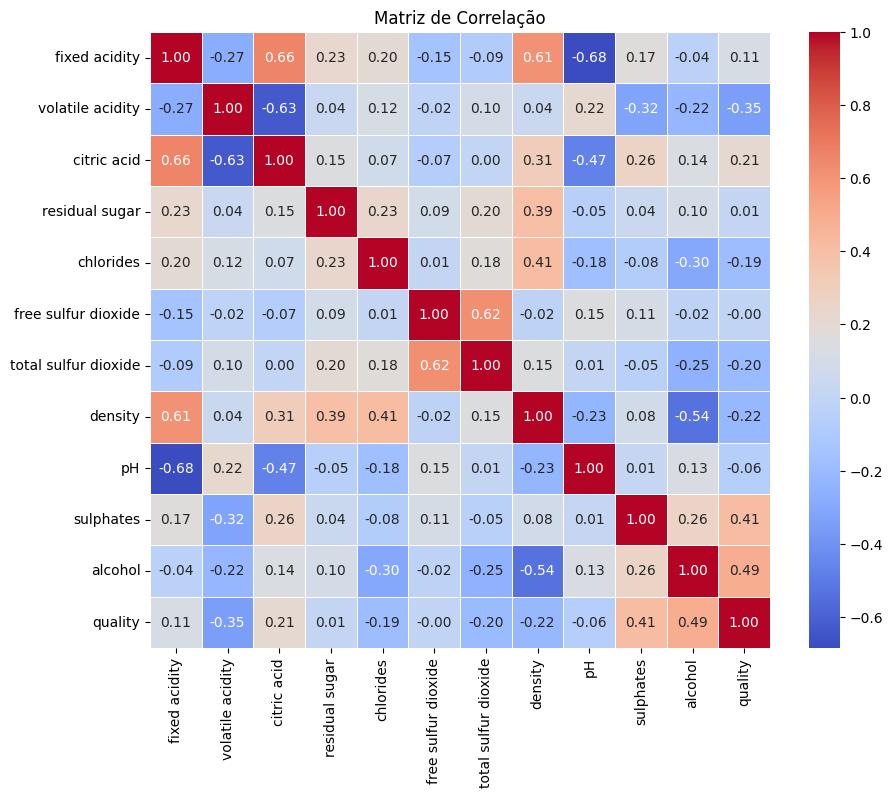

In [ ]:
correlation_matrix = df_no_outliers.corr() #Exibindo matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

A matriz de correlação nos apresentou algumas relações mais fortes em relação a variável quality, como volatile acidity, sulphates e alcohol. Sendo essas as escolhidas para alimentar nosso modelo.

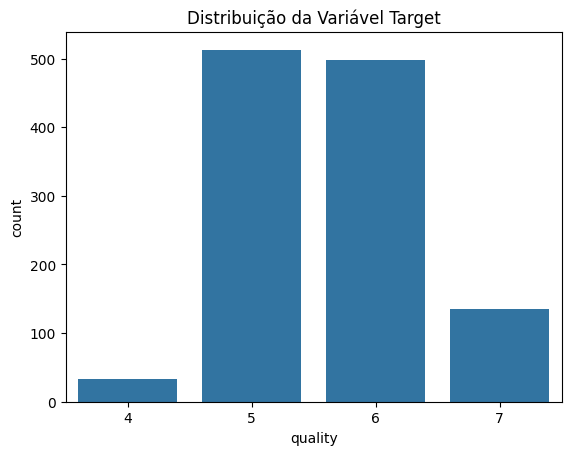

In [ ]:
sns.countplot(x='quality', data=df_no_outliers) #Visualizando o balanceamento da variável target
plt.title('Distribuição da Variável Target')
plt.show()

Nossas classes estão bem desbalanceadas. Logo mais, faremos o balanceamento com tecnica SMOTE, mas isso vai gerar problemas, pois os dados sintéticos do balanceamento tiveram métricas ruins.

In [ ]:
df_vinho = df_no_outliers[['volatile acidity', 'sulphates', 'alcohol', 'quality']] #Criando o Dataframe com as variáveis mais correlacionadas a qualidade
df_vinho.head()

,volatile acidity,sulphates,alcohol,quality
0,0.70,0.56,9.4,5
1,0.88,0.68,9.8,5
2,0.76,0.65,9.8,5
3,0.28,0.58,9.8,6
4,0.70,0.56,9.4,5


**Preparação para modelagem**

In [ ]:
X = df_vinho.drop('quality', axis=1)
y = df_vinho['quality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE #Balanceamento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

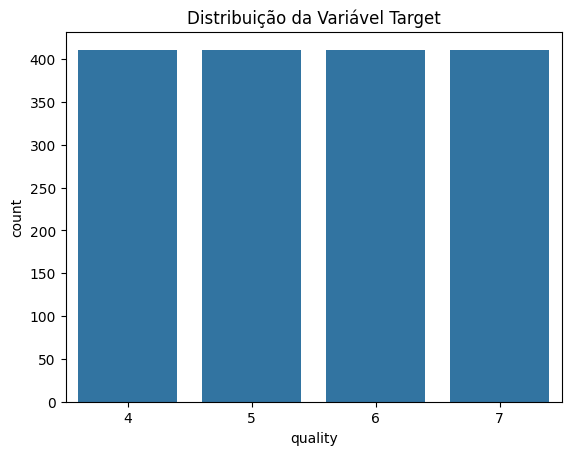

In [ ]:
sns.countplot(x=y_train_bal) #Visualização da variável target balanceada
plt.title('Distribuição da Variável Target')
plt.show()

# Modelagem


In [ ]:
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = modelo_rf.predict(X_test)

# Avaliação

In [ ]:
print(classification_report(y_test, y_pred)) #Métricas do modelo

              precision    recall  f1-score   support

           4       0.05      0.11      0.07         9
           5       0.72      0.70      0.71       102
           6       0.65      0.60      0.62        99
           7       0.56      0.58      0.57        26

    accuracy                           0.62       236
   macro avg       0.49      0.50      0.49       236
weighted avg       0.65      0.62      0.63       236



O modelo teve um desempenho muito baixo para a classe 4 e insatisfatório para classe 7. Essas classes eram a que sofreram o maior balanceamento do SMOTE. Acredito que o não balanceamento poderia trazer melhores resultados.

# Melhorando os Hyperparametros

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(
    estimator=modelo_rf,
    param_distributions=param_grid,
    n_iter=100,  # Número de iterações
    scoring='accuracy',  # Métrica de avaliação
    cv=5,  # Número de folds para validação cruzada
    verbose=2,  # Nível de verbosidade
    random_state=42,  # Semente aleatória
    n_jobs=-1  # Use todos os núcleos do processador
)

# Treine o modelo com RandomizedSearchCV
random_search.fit(X_train_bal, y_train_bal)

# Imprima os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", random_search.best_params_)

# Obtenha o melhor modelo
melhor_modelo = random_search.best_estimator_

# Faça previsões com o melhor modelo
y_pred_melhor = melhor_modelo.predict(X_test)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
165 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Melhores hiperparâmetros: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}


In [ ]:
print(classification_report(y_test, y_pred_melhor)) #Metricas do modelo melhorado

              precision    recall  f1-score   support

           4       0.06      0.11      0.08         9
           5       0.72      0.73      0.72       102
           6       0.68      0.63      0.65        99
           7       0.60      0.58      0.59        26

    accuracy                           0.64       236
   macro avg       0.51      0.51      0.51       236
weighted avg       0.66      0.64      0.65       236



Houve uma pequena melhora em métricas de todas as classes, mas não o suficientemente expressiva. Nossa acurácia foi de 0,62 para 0,64. O melhor resultado que tivemos foi o recall da classe 5. Nosso modelo previu corretamente 73% dos vinhos dessa classe que são realmente da classe 5. Em contrapartida, apenas 6% das previsões que ele da classe 4, eram realmente da classe 4.

# Algumas considerações

Nesse modelo, acreditamos que o não balanceamento pode ser positivo para o treinamento do modelo, mas ainda assim, pode errar todos os vinhos da classe minoritária.

A padronização dos dados poderiam melhorar a vizualiação dos outliers, mas pode ser que não teriam impacto em arvores de decisão.

A não remoção dos outliers poderia ser possível, talvez até melhor, para o modelo, considerando que árvores de decisão funcionem melhor sem o pré-processamento.